# 读取PASCAL VOC数据库并且可视化

In [3]:
import xml.etree.ElementTree as ET
import os
import cv2
import matplotlib.pyplot as plt

## 定义工具函数

In [4]:
def get_files_list(image_dir, suffix = ["jpg", "png"]):
    # 检查是否存在该目录
    if not os.path.exists(image_dir):
        print("file path not exists")
    imglist = []
    for root, dirs, files in os.walk(image_dir):
        # 遍历文件, 将图片文件放到imglist中
        for filename in files:
            if filename.split(".")[-1] in suffix:
                filepath = os.path.join(root, filename)
                imglist.append(filepath)
    return imglist

In [5]:
def xml_parse(file_path):
    tree = ET.parse(file_path)
    objects = []
    for obj in tree.findall("object"):
        obj_struct = {}
        obj_struct["name"] = obj.find("name").text
        bbox = obj.find("bndbox")
        obj_struct["bbox"] = [int(bbox.find("xmin").text), int(bbox.find("ymin").text),
                              int(bbox.find("xmax").text), int(bbox.find("ymax").text)]
        objects.append(obj_struct)
    return objects

In [6]:
xml_parse(r"E:\jupyterLab\深度学习基础\PASCAL2007\VOCtrainval_06-Nov-2007\VOCdevkit\VOC2007\Annotations\000005.xml")

[{'bbox': [263, 211, 324, 339], 'name': 'chair'},
 {'bbox': [165, 264, 253, 372], 'name': 'chair'},
 {'bbox': [5, 244, 67, 374], 'name': 'chair'},
 {'bbox': [241, 194, 295, 299], 'name': 'chair'},
 {'bbox': [277, 186, 312, 220], 'name': 'chair'}]

## 可视化bbox并打上标签

.\VOCtrainval_06-Nov-2007\VOCdevkit\VOC2007\JPEGImages\000005.jpg
[{'name': 'chair', 'bbox': [263, 211, 324, 339]}, {'name': 'chair', 'bbox': [165, 264, 253, 372]}, {'name': 'chair', 'bbox': [5, 244, 67, 374]}, {'name': 'chair', 'bbox': [241, 194, 295, 299]}, {'name': 'chair', 'bbox': [277, 186, 312, 220]}]


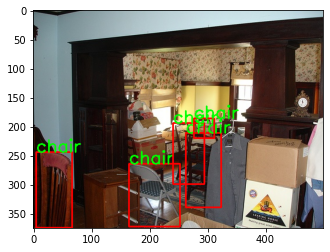

.\VOCtrainval_06-Nov-2007\VOCdevkit\VOC2007\JPEGImages\000007.jpg
[{'name': 'car', 'bbox': [141, 50, 500, 330]}]


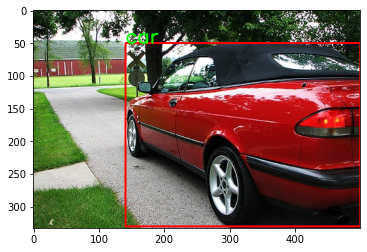

In [11]:
# 定义图片和标注根目录
image_dir = r".\VOCtrainval_06-Nov-2007\VOCdevkit\VOC2007\JPEGImages"
annotations_dir = image_dir.replace("JPEGImages", "Annotations")
# 读取图片和标注路径
images_list = get_files_list(image_dir)
annotations_list = get_files_list(annotations_dir, ["xml"])
# 遍历图片和标注并使用opencv可视化
for image_path, annoation_path in list(zip(images_list, annotations_list))[:2]:
        objects = xml_parse(annoation_path)
        print(image_path)
        print(objects)
        print("=======================")
        img = cv2.imread(image_path)  # opencv默认的模式是bgr, 其坐标系是屏幕坐标
        # 绘制标注和bbox
        for obj in objects:
            bbox = obj["bbox"]
            p1, p2 = (bbox[0], bbox[1]), (bbox[2], bbox[3])
            org = (bbox[0], bbox[1])
            cv2.rectangle(img, p1, p2, (0, 0, 255), 2)
            cv2.putText(img, obj["name"], org, cv2.FONT_ITALIC, 1, (0, 255, 0), 2)
        plt.imshow(img[:, :, ::-1])
        plt.show()

In [6]:
help(cv2.putText)

Help on built-in function putText:

putText(...)
    putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
    .   @brief Draws a text string.
    .   
    .   The function cv::putText renders the specified text string in the image. Symbols that cannot be rendered
    .   using the specified font are replaced by question marks. See #getTextSize for a text rendering code
    .   example.
    .   
    .   @param img Image.
    .   @param text Text string to be drawn.
    .   @param org Bottom-left corner of the text string in the image.
    .   @param fontFace Font type, see #HersheyFonts.
    .   @param fontScale Font scale factor that is multiplied by the font-specific base size.
    .   @param color Text color.
    .   @param thickness Thickness of the lines used to draw a text.
    .   @param lineType Line type. See #LineTypes
    .   @param bottomLeftOrigin When true, the image data origin is at the bottom-left corner. Otherwise,
   